# Objective

To analyze the performance of 3 ex man united managers over the course of their first 2 seasons. 

This data project gives insights on how David Moyes, Louis Van Gaal and Jose Mourinho performed at the club when they became managers in their respective seasons, taking into account the number of wins and losses during each season of their tenure. 

# Context

Manchester United, popularly nicknamed as 'The Red Devils', has unarguably been one of the most successful clubs in football history. 

Sir Alex Ferguson has been the most successful manager for the club. He has won 38 trophies as manager, including 13 Premier League titles, 5 FA Cups and 2 UEFA Champions Leagues between 1986 and 2013, after which he announced his retirement.

David Moyes then took over in 2013, a time of tumult for the club after SAF decided to step down. Hailed as the perfect successor to Sir Alex, he was sacked after one season, due to lack of performance.

Then came in Louis Van Gaal in 2014, the famous coach for an once-all star team of Netherlands and Bayern Munich. The tenure of his stay was 2 years and he was sacked in 2016, with protests from fans that he was destroying Manchester United's signature style of play.

Following this, the club roped in Jose Mourinho for the job, an extremely controversial person for many reasons, a man who had won the Champions League with Porto and the Premier League with Chelsea, a 'man of heavy words', as many of his critics say.

Was the firing of Moyes and Van Gaal justified? How much better did Mourinho fare against his counter parts? Who was the most promising manager out of the 3?  

# Understanding the data

The statistics were collected from Opta(official stats collector of the Premier League)of each team in every season(season totals) from 2006/2007 (i.e. the season from which the collection of these detailed stats began), all the way to 2017/2018.

The stats can be categorised as follows:

General - column 1-5 (start counting from 0)

wins, losses, goals, yellow cards, red cards

Attack - column 6-15

shots, shots on target, hit woodwork, goals from header, goals from penalty, goals from free kick, goals from inside box, goals from outside box, goals from counter attack, offsides

Defence - column 16-28

clean sheets, goals conceded, saves, blocks, interceptions, tackles, last man tackles, clearances, headed clearances, own goals, penalties conceded, goals conceded from penalty

Team Play - column 29-34

passes, through balls, long passes, backwards passes, crosses, corners taken

Others - column 35-42

touches, big chances missed, clearances off line, dispossessed, penalties saved, high claims, punches, season

Data was extracted from https://www.premierleague.com/stats/top/clubs/wins?se=79

Note that null values indicate that those values were missing on the Premier League's website

For the purpose of this analysis, we will only be looking at certain key metrics to gauge the team's performance under the manager. 

# Importing libraries and loading the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('stats.csv')

In [2]:
df.shape

(240, 42)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  240 non-null    object 
 1   wins                  240 non-null    float64
 2   losses                240 non-null    float64
 3   goals                 240 non-null    float64
 4   total_yel_card        240 non-null    float64
 5   total_red_card        240 non-null    float64
 6   total_scoring_att     240 non-null    float64
 7   ontarget_scoring_att  240 non-null    float64
 8   hit_woodwork          240 non-null    float64
 9   att_hd_goal           240 non-null    float64
 10  att_pen_goal          240 non-null    float64
 11  att_freekick_goal     240 non-null    float64
 12  att_ibox_goal         240 non-null    float64
 13  att_obox_goal         240 non-null    float64
 14  goal_fastbreak        240 non-null    float64
 15  total_offside         2

## Previewing the data 

In [4]:
df.head(10)

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
5,Bolton Wanderers,16.0,14.0,47.0,84.0,4.0,404.0,120.0,7.0,10.0,...,942.0,217.0,18932.0,NaN,6.0,NaN,2.0,44.0,21.0,2006-2007
6,Reading,16.0,15.0,52.0,38.0,3.0,419.0,132.0,8.0,15.0,...,1067.0,280.0,18017.0,NaN,2.0,NaN,0.0,63.0,21.0,2006-2007
7,Blackburn Rovers,15.0,16.0,52.0,77.0,6.0,478.0,155.0,5.0,12.0,...,911.0,205.0,20812.0,NaN,8.0,NaN,5.0,56.0,25.0,2006-2007
8,Everton,15.0,10.0,52.0,65.0,2.0,465.0,153.0,9.0,9.0,...,867.0,208.0,19250.0,NaN,2.0,NaN,1.0,83.0,15.0,2006-2007
9,Portsmouth,14.0,12.0,45.0,48.0,1.0,525.0,186.0,9.0,13.0,...,783.0,247.0,19377.0,NaN,4.0,NaN,2.0,79.0,30.0,2006-2007


In [5]:
df.tail(10)

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
230,AFC Bournemouth,11.0,16.0,45.0,55.0,1.0,465.0,158.0,10.0,4.0,...,707.0,218.0,23634.0,24.0,6.0,419.0,1.0,37.0,20.0,2017-2018
231,Crystal Palace,11.0,16.0,45.0,72.0,0.0,476.0,151.0,8.0,4.0,...,703.0,210.0,22434.0,55.0,6.0,482.0,0.0,39.0,11.0,2017-2018
232,Watford,11.0,19.0,44.0,63.0,4.0,440.0,132.0,8.0,9.0,...,713.0,183.0,23127.0,36.0,5.0,410.0,0.0,25.0,28.0,2017-2018
233,West Ham United,10.0,16.0,48.0,73.0,2.0,372.0,133.0,14.0,6.0,...,732.0,161.0,21928.0,29.0,4.0,390.0,1.0,19.0,19.0,2017-2018
234,Brighton and Hove Albion,9.0,16.0,34.0,54.0,2.0,384.0,119.0,8.0,7.0,...,680.0,163.0,21668.0,30.0,10.0,296.0,2.0,38.0,14.0,2017-2018
235,Huddersfield Town,9.0,19.0,28.0,62.0,3.0,362.0,109.0,8.0,5.0,...,765.0,165.0,22619.0,21.0,6.0,416.0,2.0,31.0,24.0,2017-2018
236,Swansea City,8.0,21.0,28.0,51.0,1.0,338.0,103.0,8.0,3.0,...,694.0,150.0,22775.0,26.0,1.0,439.0,3.0,44.0,15.0,2017-2018
237,Southampton,7.0,16.0,37.0,63.0,2.0,450.0,145.0,15.0,7.0,...,800.0,227.0,24639.0,37.0,4.0,379.0,1.0,29.0,13.0,2017-2018
238,Stoke City,7.0,19.0,35.0,62.0,1.0,384.0,132.0,8.0,8.0,...,598.0,136.0,20368.0,33.0,3.0,402.0,0.0,27.0,14.0,2017-2018
239,West Bromwich Albion,6.0,19.0,31.0,73.0,1.0,378.0,114.0,7.0,10.0,...,784.0,176.0,20552.0,28.0,3.0,446.0,0.0,40.0,5.0,2017-2018


## Filtering data that is relevant to Man United 

In [6]:
df_united = df[df['team']=='Manchester United']

In [7]:
df_united.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
20,Manchester United,27.0,5.0,80.0,51.0,2.0,696.0,260.0,16.0,12.0,...,936.0,261.0,26620.0,NaN,10.0,627.0,0.0,47.0,23.0,2007-2008
40,Manchester United,28.0,4.0,68.0,61.0,5.0,715.0,230.0,9.0,7.0,...,1039.0,257.0,30077.0,NaN,3.0,579.0,0.0,56.0,22.0,2008-2009
61,Manchester United,27.0,7.0,86.0,49.0,4.0,695.0,221.0,12.0,14.0,...,1156.0,297.0,28968.0,NaN,2.0,622.0,0.0,65.0,18.0,2009-2010
80,Manchester United,23.0,4.0,78.0,56.0,3.0,618.0,212.0,15.0,18.0,...,1005.0,243.0,26671.0,50.0,2.0,471.0,0.0,45.0,16.0,2010-2011


In [8]:
df_united.shape

(12, 42)

## Creating separate dataframes for wins and losses

In [9]:
mu_wins_season = df_united[['wins','season']]

In [10]:
#wins for every season
mu_wins_season

,wins,season
0,28.0,2006-2007
20,27.0,2007-2008
40,28.0,2008-2009
61,27.0,2009-2010
80,23.0,2010-2011
101,28.0,2011-2012
120,28.0,2012-2013
146,19.0,2013-2014
163,20.0,2014-2015
183,19.0,2015-2016


In [11]:
mu_losses_season = df_united[['losses','season']]

In [12]:
#losses for every season
mu_losses_season

,losses,season
0,5.0,2006-2007
20,5.0,2007-2008
40,4.0,2008-2009
61,7.0,2009-2010
80,4.0,2010-2011
101,5.0,2011-2012
120,5.0,2012-2013
146,12.0,2013-2014
163,8.0,2014-2015
183,10.0,2015-2016


## Plotting Wins and Losses per Season

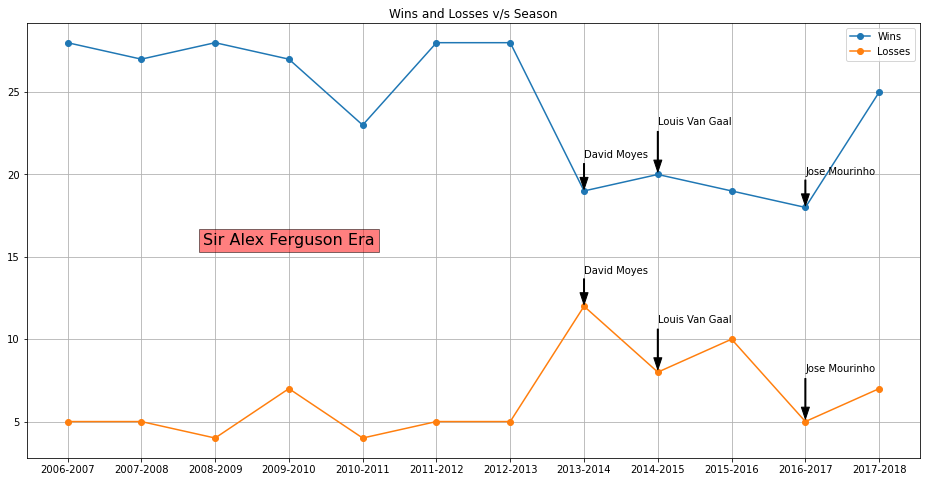

In [13]:
#Plotting Wins and Losses v/s Season
#plt.rcParams['figure.figsize'] = [12, 8] #creates a graph of 10x7 inches

plt.figure(figsize = (16,8))
plt.plot(mu_wins_season['season'], mu_wins_season['wins'], label = 'Wins', marker='o') #plot Wins v Season
plt.plot(mu_losses_season['season'], mu_losses_season['losses'], label = 'Losses', marker='o') #plot Loss vs Season, with markers and label
plt.title('Wins and Losses v/s Season')
plt.legend(['Wins','Losses'])
plt.grid(b=True)
#x1 = mu_wins_season['season'].tolist()
#y1 = mu_wins_season['wins'].tolist()

plt.annotate('David Moyes', xy=('2013-2014',19), xytext=('2013-2014', 21),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For the wins curve. The label is Moyes comes in.
    #xy is the position of marker point. xytext is position of label text. 
    
plt.annotate('David Moyes', xy=('2013-2014',12), xytext=('2013-2014', 14),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For losses curve. The label is Moyes comes in.
    
plt.annotate('Louis Van Gaal', xy=('2014-2015',20), xytext=('2014-2015', 23),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For wins curve when LVG comes in.
    
plt.annotate('Louis Van Gaal', xy=('2014-2015',8), xytext=('2014-2015', 11),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10)
    #For losses curve when LVG comes in.
    
plt.annotate('Jose Mourinho', xy=('2016-2017',18), xytext=('2016-2017', 20),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For wins curve when Mou comes in. 
    
plt.annotate('Jose Mourinho', xy=('2016-2017',5), xytext=('2016-2017', 8),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For losses curve when Mou comes in. 
    
plt.text('2009-2010',16,'Sir Alex Ferguson Era', horizontalalignment='center', verticalalignment='center', fontsize =16, bbox=dict(facecolor='red', alpha=0.5)) 
    #For the middle big text
    
plt.show()

## Comparing the first season performance of managers

### David Moyes

First Season (2013-14) :

Total number of matches = 38

Total number of wins = 19

Win percentage = 19/38 = 50%

Total number of losses = 12

Loss percentage = 12/38 = 31.6%

Decrease in wins from previous season = 28 - 19 = 9

Increase in losses from last season = 12 - 5 = 7

### Louis Van Gaal

First Season (2014-15) :

Total number of matches = 38

Total number of wins = 20

Win percentage = 20/38 = 52.6%

Total number of losses = 8

Loss percentage = 8/38 = 21%

Increase in wins from last season = 20 - 19 = 1

Decrease in losses from last season = 12 - 8 = 4

### Jose Mourinho

First Season (2016-17) :

Total number of matches = 38

Total number of wins = 18

Win percentage = 18/38 = 47.4%

Total number of losses = 5

Loss percentage = 5/38 = 13.2%

Decrease in wins from last season = 19 - 18 = 1

Decrease in losses from last season = 10 - 5 = 5

## First Season Performance Review

Based on the number of wins and win percentage, Louis Van Gaal had the most successful first season among the 3 managers, with a win percentage of 52.6%. 

Based on the number of losses and loss percentage, it was Jose Mourinho who had the least losses in the first season, only 13.2% losses compared to the other 2 managers. 

Overall the performance of Man United under David Moyes was the least desirable, as they had the lowest win percentage (50%) and highest loss percentage (31.6%).

## Comparing the second season performance of managers

### Louis Van Gaal

Second Season (2015-16) :

Total number of matches = 38

Total number of wins = 19

Win percentage = 19/38 = 50.0%

Total number of losses = 10

Loss percentage = 10/38 = 26.3%

### Jose Mourinho

Second Season (2017-18) :

Total number of matches = 38

Total number of wins = 25

Win percentage = 25/38 = 65.8%

Total number of losses = 7

Loss percentage = 7/38 = 18.4%

## Second Season Performance Review

It is quite apparent based on win percentage and loss percentage that Jose Mourinho's second season was a cut above Louis Van Gaal's second season, whose performance had decreased compared to his first season.

Jose Mourinho has a significant leap in win percentage, from 47.4% to 65.8% in his second season, at the expense of only 2 additional losses. 